In [1]:
# I will import all needed modules here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [2]:
feature_list = ['tcp_tcp.checksum.status_0',
 'tcp_tcp.urgent_pointer_0',
 'frame_frame.marked_0',
 'ip_ip.frag_offset_0',
 'ip_ip.flags_tree_ip.flags.mf_0',
 'ip_ip.flags_0',
 'ip_ip.flags_tree_ip.flags.df_0',
 'tcp_tcp.flags_0',
 'tcp_tcp.flags_tree_tcp.flags.res_0',
 'tcp_tcp.flags_tree_tcp.flags.syn_0',
 'ip_ip.proto_0',
 'http_http.request_number_0',
 'tcp_tcp.window_size_scalefactor_0',
 'frame_frame.protocols_0',
 'tcp_tcp.dstport_0',
 'tcp_tcp.seq_0',
 'tcp_tcp.flags_tree_tcp.flags.fin_0',
 'tcp_tcp.completeness_0',
 'tcp_tcp.nxtseq_0',
 'frame_frame.time_delta_0',
 'tcp_tcp.flags_tree_tcp.flags.urg_0',
 'ip_ip.checksum_0',
 'ip_ip.version_0',
 'tcp_tcp.len_0',
 'tcp_tcp.window_size_0',
 'tcp_tcp.srcport_0',
 'tcp_tcp.flags_tree_tcp.flags.ack_0',
 'tcp_tcp.checksum_0',
 'tcp_Timestamps_tcp.time_delta_0',
 'tcp_tcp.ack_0',
 'tcp_tcp.stream_0',
 'tcp_tcp.ack_raw_0',
 'frame_frame.ignored_0',
 'ip_ip.hdr_len_0',
 'tcp_tcp.flags_tree_tcp.flags.ece_0',
 'ip_ip.len_0',
 'http_http.accept_0',
 'tcp_tcp.flags_tree_tcp.flags.cwr_0',
 'ip_ip.ttl_0',
 'frame_frame.time_relative_0',
 'frame_frame.len_0',
 'Hancitor_url_2',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_0',
 'frame_frame.cap_len_0',
 'ip_ip.checksum.status_0',
 'tcp_tcp.flags_tree_tcp.flags.ae_0',
 'http_http.request_0',
 'ip_ip.dsfield_0',
 'tcp_tcp.flags_tree_tcp.flags.push_0',
 'tcp_tcp.window_size_value_0',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_0',
 'tcp_Timestamps_tcp.time_relative_0',
 'ip_ip.id_0',
 'tcp_tcp.hdr_len_0',
 'http_\\r\\n_0',
 'ip_ip.flags_tree_ip.flags.rb_0',
 'tcp_tcp.flags_tree_tcp.flags.str_0',
 'frame_frame.offset_shift_0',
 'tcp_tcp.flags_tree_tcp.flags.reset_0',
 'http_http.cache_control_0',
 'tcp_tcp.seq_raw_0',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_0',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0',
 'frame_frame.encap_type_0',
 'eth_eth.type_0',
 'tcp_tcp.checksum.status_1',
 'tcp_tcp.urgent_pointer_1',
 'frame_frame.marked_1',
 'ip_ip.frag_offset_1',
 'http_http.content_type_1',
 'ip_ip.flags_tree_ip.flags.mf_1',
 'ip_ip.flags_1',
 'ip_ip.flags_tree_ip.flags.df_1',
 'tcp_tcp.flags_1',
 'tcp_tcp.flags_tree_tcp.flags.res_1',
 'tcp_tcp.flags_tree_tcp.flags.syn_1',
 'ip_ip.proto_1',
 'http_http.request_number_1',
 'http_http.file_data_1',
 'tcp_tcp.window_size_scalefactor_1',
 'frame_frame.protocols_1',
 'tcp_tcp.dstport_1',
 'tcp_tcp.seq_1',
 'tcp_tcp.flags_tree_tcp.flags.fin_1',
 'tcp_tcp.completeness_1',
 'tcp_tcp.nxtseq_1',
 'frame_frame.time_delta_1',
 'tcp_tcp.flags_tree_tcp.flags.urg_1',
 'ip_ip.checksum_1',
 'ip_ip.version_1',
 'tcp_tcp.len_1',
 'tcp_tcp.window_size_1',
 'tcp_tcp.srcport_1',
 'tcp_tcp.flags_tree_tcp.flags.ack_1',
 'tcp_tcp.checksum_1',
 'tcp_Timestamps_tcp.time_delta_1',
 'tcp_tcp.ack_1',
 'tcp_tcp.stream_1',
 'tcp_tcp.ack_raw_1',
 'frame_frame.ignored_1',
 'tcp_tcp.analysis_tcp.analysis.acks_frame_1',
 'ip_ip.hdr_len_1',
 'tcp_tcp.analysis_tcp.analysis.ack_rtt_1',
 'http_http.content_length_header_1',
 'tcp_tcp.flags_tree_tcp.flags.ece_1',
 'ip_ip.len_1',
 'http_http.response_in_1',
 'http_http.accept_1',
 'tcp_tcp.flags_tree_tcp.flags.cwr_1',
 'ip_ip.ttl_1',
 'frame_frame.time_relative_1',
 'frame_frame.len_1',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_1',
 'frame_frame.cap_len_1',
 'ip_ip.checksum.status_1',
 'tcp_tcp.flags_tree_tcp.flags.ae_1',
 'http_http.request_1',
 'ip_ip.dsfield_1',
 'http_http.content_length_header_tree_http.content_length_1',
 'tcp_tcp.flags_tree_tcp.flags.push_1',
 'tcp_tcp.window_size_value_1',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_1',
 'tcp_Timestamps_tcp.time_relative_1',
 'ip_ip.id_1',
 'tcp_tcp.hdr_len_1',
 'http_\\r\\n_1',
 'ip_ip.flags_tree_ip.flags.rb_1',
 'tcp_tcp.flags_tree_tcp.flags.str_1',
 'frame_frame.offset_shift_1',
 'tcp_tcp.flags_tree_tcp.flags.reset_1',
 'http_http.cache_control_1',
 'tcp_tcp.seq_raw_1',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_1',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_1',
 'frame_frame.encap_type_1',
 'eth_eth.type_1',
 'tcp_tcp.checksum.status_2',
 'tcp_tcp.urgent_pointer_2',
 'frame_frame.marked_2',
 'ip_ip.frag_offset_2',
 'http_http.content_type_2',
 'ip_ip.flags_tree_ip.flags.mf_2',
 'ip_ip.flags_2',
 'ip_ip.flags_tree_ip.flags.df_2',
 'tcp_tcp.flags_2',
 'tcp_tcp.flags_tree_tcp.flags.res_2',
 'tcp_tcp.flags_tree_tcp.flags.syn_2',
 'ip_ip.proto_2',
 'http_http.file_data_2',
 'tcp_tcp.window_size_scalefactor_2',
 'frame_frame.protocols_2',
 'tcp_tcp.dstport_2',
 'tcp_tcp.seq_2',
 'tcp_tcp.flags_tree_tcp.flags.fin_2',
 'tcp_tcp.completeness_2',
 'tcp_tcp.nxtseq_2',
 'frame_frame.time_delta_2',
 'Hancitor_url_2',
 'tcp_tcp.flags_tree_tcp.flags.urg_2',
 'http_http.server_2',
 'ip_ip.checksum_2',
 'ip_ip.version_2',
 'tcp_tcp.len_2',
 'http_http.response_number_2',
 'tcp_tcp.window_size_2',
 'tcp_tcp.srcport_2',
 'tcp_tcp.flags_tree_tcp.flags.ack_2',
 'tcp_tcp.checksum_2',
 'tcp_Timestamps_tcp.time_delta_2',
 'tcp_tcp.ack_2',
 'http_http.response_2',
 'tcp_tcp.stream_2',
 'tcp_tcp.ack_raw_2',
 'frame_frame.ignored_2',
 'ip_ip.hdr_len_2',
 'tcp_tcp.flags_tree_tcp.flags.ece_2',
 'ip_ip.len_2',
 'http_http.connection_2',
 'http_http.date_2',
 'tcp_tcp.flags_tree_tcp.flags.cwr_2',
 'ip_ip.ttl_2',
 'frame_frame.time_relative_2',
 'frame_frame.len_2',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_2',
 'frame_frame.cap_len_2',
 'ip_ip.checksum.status_2',
 'http_http.time_2',
 'tcp_tcp.flags_tree_tcp.flags.ae_2',
 'http_http.response.line_2',
 'ip_ip.dsfield_2',
 'tcp_tcp.flags_tree_tcp.flags.push_2',
 'tcp_tcp.window_size_value_2',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_2',
 'tcp_Timestamps_tcp.time_relative_2',
 'ip_ip.id_2',
 'tcp_tcp.hdr_len_2',
 'http_\\r\\n_2',
 'ip_ip.flags_tree_ip.flags.rb_2',
 'tcp_tcp.flags_tree_tcp.flags.str_2',
 'frame_frame.offset_shift_2',
 'tcp_tcp.flags_tree_tcp.flags.reset_2',
 'tcp_tcp.seq_raw_2',
 'http_http.transfer_encoding_2',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_2',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_2',
 'frame_frame.encap_type_2',
 'http_http.request_in_2',
 'eth_eth.type_2',
 'tcp_tcp.checksum.status_3',
 'tcp_tcp.urgent_pointer_3',
 'frame_frame.marked_3',
 'ip_ip.frag_offset_3',
 'ip_ip.flags_tree_ip.flags.mf_3',
 'ip_ip.flags_3',
 'ip_ip.flags_tree_ip.flags.df_3',
 'tcp_tcp.flags_3',
 'tcp_tcp.flags_tree_tcp.flags.res_3',
 'tcp_tcp.flags_tree_tcp.flags.syn_3',
 'ip_ip.proto_3',
 'http_http.request_number_3',
 'tcp_tcp.window_size_scalefactor_3',
 'frame_frame.protocols_3',
 'tcp_tcp.dstport_3',
 'tcp_tcp.seq_3',
 'tcp_tcp.flags_tree_tcp.flags.fin_3',
 'tcp_tcp.completeness_3',
 'tcp_tcp.nxtseq_3',
 'frame_frame.time_delta_3',
 'tcp_tcp.flags_tree_tcp.flags.urg_3',
 'ip_ip.checksum_3',
 'ip_ip.version_3',
 'tcp_tcp.len_3',
 'tcp_tcp.window_size_3',
 'tcp_tcp.srcport_3',
 'tcp_tcp.flags_tree_tcp.flags.ack_3',
 'tcp_tcp.checksum_3',
 'tcp_Timestamps_tcp.time_delta_3',
 'tcp_tcp.ack_3',
 'tcp_tcp.stream_3',
 'tcp_tcp.ack_raw_3',
 'frame_frame.ignored_3',
 'ip_ip.hdr_len_3',
 'tcp_tcp.flags_tree_tcp.flags.ece_3',
 'ip_ip.len_3',
 'http_http.accept_3',
 'tcp_tcp.flags_tree_tcp.flags.cwr_3',
 'ip_ip.ttl_3',
 'frame_frame.time_relative_3',
 'frame_frame.len_3',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_3',
 'frame_frame.cap_len_3',
 'ip_ip.checksum.status_3',
 'tcp_tcp.flags_tree_tcp.flags.ae_3',
 'http_http.request_3',
 'ip_ip.dsfield_3',
 'tcp_tcp.flags_tree_tcp.flags.push_3',
 'tcp_tcp.window_size_value_3',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_3',
 'tcp_Timestamps_tcp.time_relative_3',
 'ip_ip.id_3',
 'tcp_tcp.hdr_len_3',
 'http_\\r\\n_3',
 'ip_ip.flags_tree_ip.flags.rb_3',
 'tcp_tcp.flags_tree_tcp.flags.str_3',
 'frame_frame.offset_shift_3',
 'tcp_tcp.flags_tree_tcp.flags.reset_3',
 'http_http.cache_control_3',
 'tcp_tcp.seq_raw_3',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3',
 'http_http.next_request_in_3',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_3',
 'frame_frame.encap_type_3',
 'eth_eth.type_3',
 'tcp_tcp.checksum.status_4',
 'tcp_tcp.urgent_pointer_4',
 'frame_frame.marked_4',
 'ip_ip.frag_offset_4',
 'ip_ip.flags_tree_ip.flags.mf_4',
 'ip_ip.flags_4',
 'ip_ip.flags_tree_ip.flags.df_4',
 'tcp_tcp.flags_4',
 'tcp_tcp.flags_tree_tcp.flags.res_4',
 'tcp_tcp.flags_tree_tcp.flags.syn_4',
 'ip_ip.proto_4',
 'http_http.request_number_4',
 'tcp_tcp.window_size_scalefactor_4',
 'frame_frame.protocols_4',
 'tcp_tcp.dstport_4',
 'tcp_tcp.seq_4',
 'tcp_tcp.flags_tree_tcp.flags.fin_4',
 'tcp_tcp.completeness_4',
 'tcp_tcp.nxtseq_4',
 'frame_frame.time_delta_4',
 'tcp_tcp.flags_tree_tcp.flags.urg_4',
 'ip_ip.checksum_4',
 'ip_ip.version_4',
 'tcp_tcp.len_4',
 'tcp_tcp.window_size_4',
 'tcp_tcp.srcport_4',
 'tcp_tcp.flags_tree_tcp.flags.ack_4',
 'tcp_tcp.checksum_4',
 'tcp_Timestamps_tcp.time_delta_4',
 'tcp_tcp.ack_4',
 'tcp_tcp.stream_4',
 'tcp_tcp.ack_raw_4',
 'frame_frame.ignored_4',
 'ip_ip.hdr_len_4',
 'tcp_tcp.flags_tree_tcp.flags.ece_4',
 'ip_ip.len_4',
 'http_http.accept_4',
 'tcp_tcp.flags_tree_tcp.flags.cwr_4',
 'ip_ip.ttl_4',
 'frame_frame.time_relative_4',
 'frame_frame.len_4',
 'ip_ip.dsfield_tree_ip.dsfield.ecn_4',
 'frame_frame.cap_len_4',
 'ip_ip.checksum.status_4',
 'tcp_tcp.flags_tree_tcp.flags.ae_4',
 'http_http.request_4',
 'ip_ip.dsfield_4',
 'tcp_tcp.flags_tree_tcp.flags.push_4',
 'tcp_tcp.window_size_value_4',
 'ip_ip.dsfield_tree_ip.dsfield.dscp_4',
 'tcp_Timestamps_tcp.time_relative_4',
 'ip_ip.id_4',
 'tcp_tcp.hdr_len_4',
 'http_\\r\\n_4',
 'ip_ip.flags_tree_ip.flags.rb_4',
 'http_http.prev_request_in_4',
 'tcp_tcp.flags_tree_tcp.flags.str_4',
 'frame_frame.offset_shift_4',
 'tcp_tcp.flags_tree_tcp.flags.reset_4',
 'http_http.cache_control_4',
 'tcp_tcp.seq_raw_4',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_4',
 'http_http.next_request_in_4',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_4',
 'frame_frame.encap_type_4',
 'eth_eth.type_4',
 'malware']

In [3]:
feature_list = set(feature_list)

In [4]:
feature_list

{'Hancitor_url_2',
 'eth_eth.type_0',
 'eth_eth.type_1',
 'eth_eth.type_2',
 'eth_eth.type_3',
 'eth_eth.type_4',
 'frame_frame.cap_len_0',
 'frame_frame.cap_len_1',
 'frame_frame.cap_len_2',
 'frame_frame.cap_len_3',
 'frame_frame.cap_len_4',
 'frame_frame.encap_type_0',
 'frame_frame.encap_type_1',
 'frame_frame.encap_type_2',
 'frame_frame.encap_type_3',
 'frame_frame.encap_type_4',
 'frame_frame.ignored_0',
 'frame_frame.ignored_1',
 'frame_frame.ignored_2',
 'frame_frame.ignored_3',
 'frame_frame.ignored_4',
 'frame_frame.len_0',
 'frame_frame.len_1',
 'frame_frame.len_2',
 'frame_frame.len_3',
 'frame_frame.len_4',
 'frame_frame.marked_0',
 'frame_frame.marked_1',
 'frame_frame.marked_2',
 'frame_frame.marked_3',
 'frame_frame.marked_4',
 'frame_frame.offset_shift_0',
 'frame_frame.offset_shift_1',
 'frame_frame.offset_shift_2',
 'frame_frame.offset_shift_3',
 'frame_frame.offset_shift_4',
 'frame_frame.protocols_0',
 'frame_frame.protocols_1',
 'frame_frame.protocols_2',
 'frame

In [5]:
Hancitor_raw_data_df = pd.read_csv('Hancitor_only_data_set.csv')
Hancitor_raw_data_df['malware'] = 1
Hancitor_raw_data_df = Hancitor_raw_data_df[feature_list]
Hancitor_raw_data_df

,tcp_tcp.flags_tree_tcp.flags.ece_0,tcp_tcp.flags_tree_tcp.flags.str_3,tcp_tcp.stream_2,frame_frame.time_delta_3,ip_ip.hdr_len_2,tcp_tcp.flags_tree_tcp.flags.push_2,tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3,http_http.request_number_3,ip_ip.proto_0,tcp_tcp.srcport_4,...,frame_frame.offset_shift_3,frame_frame.offset_shift_4,tcp_tcp.flags_tree_tcp.flags.reset_0,tcp_tcp.flags_tree_tcp.flags.ae_2,frame_frame.protocols_3,tcp_tcp.dstport_0,frame_frame.time_relative_3,http_http.time_2,tcp_tcp.analysis_tcp.analysis.ack_rtt_1,ip_ip.checksum_4
0,0.0,6.0,1.0,0.443785,20.0,1.0,178.0,1.0,6.0,49800.0,...,0.0,0.0,0.0,0.0,1.0,80.0,10.887401,0.275239,0.000298,3481.0
1,0.0,6.0,1.0,0.562351,20.0,1.0,176.0,1.0,6.0,49818.0,...,0.0,0.0,0.0,0.0,1.0,80.0,2.000643,0.318871,0.000389,44355.0
2,0.0,6.0,1.0,0.549564,20.0,1.0,171.0,1.0,6.0,49843.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.627210,0.230384,0.000289,8858.0
3,0.0,6.0,1.0,0.541421,20.0,1.0,167.0,1.0,6.0,49886.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.532306,0.466376,0.000606,16803.0
4,0.0,6.0,1.0,0.572318,20.0,1.0,169.0,1.0,6.0,49826.0,...,0.0,0.0,0.0,0.0,1.0,80.0,4.967795,0.246640,0.000312,59352.0
5,0.0,6.0,1.0,0.645438,20.0,1.0,168.0,1.0,6.0,49818.0,...,0.0,0.0,0.0,0.0,1.0,80.0,3.030052,0.274490,0.000421,34491.0
6,0.0,6.0,2.0,0.393301,20.0,1.0,168.0,1.0,6.0,49834.0,...,0.0,0.0,0.0,0.0,1.0,80.0,30.271319,0.249689,0.000356,55274.0
7,0.0,6.0,1.0,0.397294,20.0,1.0,170.0,1.0,6.0,49549.0,...,0.0,0.0,0.0,0.0,1.0,80.0,9.703103,0.310731,0.000360,54464.0
8,0.0,6.0,1.0,0.577515,20.0,1.0,169.0,1.0,6.0,52882.0,...,0.0,0.0,0.0,0.0,1.0,80.0,12.895611,0.392307,0.000324,56240.0
9,0.0,6.0,1.0,0.474193,20.0,1.0,170.0,1.0,6.0,51169.0,...,0.0,0.0,0.0,0.0,1.0,80.0,13.222036,0.353072,0.000524,8826.0


In [6]:
# Rename colume 
key_remove_cols = ['ip_ip.src', 
'http_HTTP/1.1', 
'eth_eth.dst', 'http_http.host', 'http_http.request.full_uri',
'eth_eth.src', 'http_HTTP ', 'http_ [truncated]', 'http_GET ', 'data-text-lines_', 'ip_ip.dst',
 'http_http.response_for.uri', 'frame_frame.number', 'http_http.user_agent', 'frame_frame.time_epoch', 
 'urlencoded-form_Form item', 'http_POST '] 
for key in key_remove_cols:
    remove_cols = []
    for col in list(Hancitor_raw_data_df.columns):
        col = str(col)
        if key in col:
            remove_cols.append(col)
    for col in remove_cols:
        Hancitor_raw_data_df = Hancitor_raw_data_df.drop([col], axis=1)

Hancitor_raw_data_df.to_csv('USNIF_only_data_filted.csv', index=False)
Hancitor_raw_data_df.shape

list(Hancitor_raw_data_df.columns)

['tcp_tcp.flags_tree_tcp.flags.ece_0',
 'tcp_tcp.flags_tree_tcp.flags.str_3',
 'tcp_tcp.stream_2',
 'frame_frame.time_delta_3',
 'ip_ip.hdr_len_2',
 'tcp_tcp.flags_tree_tcp.flags.push_2',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3',
 'http_http.request_number_3',
 'ip_ip.proto_0',
 'tcp_tcp.srcport_4',
 'ip_ip.flags_tree_ip.flags.mf_2',
 'frame_frame.protocols_0',
 'tcp_tcp.hdr_len_3',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_4',
 'tcp_tcp.srcport_0',
 'ip_ip.ttl_4',
 'ip_ip.flags_tree_ip.flags.rb_3',
 'tcp_tcp.ack_3',
 'http_http.cache_control_4',
 'tcp_tcp.ack_raw_2',
 'tcp_tcp.flags_tree_tcp.flags.syn_3',
 'tcp_tcp.flags_tree_tcp.flags.syn_0',
 'ip_ip.hdr_len_3',
 'tcp_tcp.completeness_3',
 'http_http.request_1',
 'tcp_tcp.checksum.status_3',
 'tcp_tcp.urgent_pointer_1',
 'tcp_tcp.flags_tree_tcp.flags.ack_0',
 'tcp_tcp.nxtseq_4',
 'tcp_tcp.window_size_scalefactor_0',
 'frame_frame.len_3',
 'ip_ip.hdr_len_1',
 'frame_frame.len_1',
 'ip_ip.flags_2',
 'eth_eth.type_4',
 '

In [7]:
Hancitor_noraml_raw_data_df = pd.read_csv('normal_Hancitor_only_data_set.csv')
Hancitor_noraml_raw_data_df['malware'] = 0
Hancitor_noraml_raw_data_df = Hancitor_noraml_raw_data_df[feature_list]
Hancitor_noraml_raw_data_df

,tcp_tcp.flags_tree_tcp.flags.ece_0,tcp_tcp.flags_tree_tcp.flags.str_3,tcp_tcp.stream_2,frame_frame.time_delta_3,ip_ip.hdr_len_2,tcp_tcp.flags_tree_tcp.flags.push_2,tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3,http_http.request_number_3,ip_ip.proto_0,tcp_tcp.srcport_4,...,frame_frame.offset_shift_3,frame_frame.offset_shift_4,tcp_tcp.flags_tree_tcp.flags.reset_0,tcp_tcp.flags_tree_tcp.flags.ae_2,frame_frame.protocols_3,tcp_tcp.dstport_0,frame_frame.time_relative_3,http_http.time_2,tcp_tcp.analysis_tcp.analysis.ack_rtt_1,ip_ip.checksum_4
0,0.0,6.0,4245.0,0.000316,20.0,1.0,472.0,1.0,6.0,64177.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1966.339102,0.242753,0.0,0.0
1,0.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,6.0,375.0,...,370.0,370.0,0.0,372.0,1.0,80.0,370.000000,370.000000,0.0,375.0
2,372.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,376.0,0.0,...,0.0,0.0,372.0,0.0,1.0,375.0,0.000000,0.000000,0.0,0.0
3,0.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,6.0,375.0,...,370.0,370.0,0.0,372.0,1.0,80.0,370.000000,370.000000,0.0,375.0
4,372.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,376.0,0.0,...,0.0,0.0,372.0,0.0,1.0,375.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,372.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,372.0,0.0,389.0,375.0,0.000000,0.000000,0.0,0.0
1370,0.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,0.0,375.0,...,370.0,370.0,0.0,372.0,389.0,0.0,370.000000,370.000000,0.0,0.0
1371,0.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,389.0,80.0,0.000000,0.000000,0.0,0.0
1372,372.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,376.0,375.0,...,370.0,370.0,372.0,372.0,389.0,375.0,370.000000,370.000000,0.0,0.0


In [8]:
mixed_Hancitor_df = pd.concat([Hancitor_raw_data_df, Hancitor_noraml_raw_data_df])
mixed_Hancitor_df

,tcp_tcp.flags_tree_tcp.flags.ece_0,tcp_tcp.flags_tree_tcp.flags.str_3,tcp_tcp.stream_2,frame_frame.time_delta_3,ip_ip.hdr_len_2,tcp_tcp.flags_tree_tcp.flags.push_2,tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3,http_http.request_number_3,ip_ip.proto_0,tcp_tcp.srcport_4,...,frame_frame.offset_shift_3,frame_frame.offset_shift_4,tcp_tcp.flags_tree_tcp.flags.reset_0,tcp_tcp.flags_tree_tcp.flags.ae_2,frame_frame.protocols_3,tcp_tcp.dstport_0,frame_frame.time_relative_3,http_http.time_2,tcp_tcp.analysis_tcp.analysis.ack_rtt_1,ip_ip.checksum_4
0,0.0,6.0,1.0,0.443785,20.0,1.0,178.0,1.0,6.0,49800.0,...,0.0,0.0,0.0,0.0,1.0,80.0,10.887401,0.275239,0.000298,3481.0
1,0.0,6.0,1.0,0.562351,20.0,1.0,176.0,1.0,6.0,49818.0,...,0.0,0.0,0.0,0.0,1.0,80.0,2.000643,0.318871,0.000389,44355.0
2,0.0,6.0,1.0,0.549564,20.0,1.0,171.0,1.0,6.0,49843.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.627210,0.230384,0.000289,8858.0
3,0.0,6.0,1.0,0.541421,20.0,1.0,167.0,1.0,6.0,49886.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.532306,0.466376,0.000606,16803.0
4,0.0,6.0,1.0,0.572318,20.0,1.0,169.0,1.0,6.0,49826.0,...,0.0,0.0,0.0,0.0,1.0,80.0,4.967795,0.246640,0.000312,59352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,372.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,372.0,0.0,389.0,375.0,0.000000,0.000000,0.000000,0.0
1370,0.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,0.0,375.0,...,370.0,370.0,0.0,372.0,389.0,0.0,370.000000,370.000000,0.000000,0.0
1371,0.0,6.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,389.0,80.0,0.000000,0.000000,0.000000,0.0
1372,372.0,6.0,371.0,370.000000,376.0,372.0,371.0,380.0,376.0,375.0,...,370.0,370.0,372.0,372.0,389.0,375.0,370.000000,370.000000,0.000000,0.0


In [9]:
mixed_one_to_one_Hancitor_df = pd.concat([Hancitor_raw_data_df, Hancitor_noraml_raw_data_df.sample(n = Hancitor_raw_data_df.shape[0])])
mixed_one_to_one_Hancitor_df

,tcp_tcp.flags_tree_tcp.flags.ece_0,tcp_tcp.flags_tree_tcp.flags.str_3,tcp_tcp.stream_2,frame_frame.time_delta_3,ip_ip.hdr_len_2,tcp_tcp.flags_tree_tcp.flags.push_2,tcp_tcp.analysis_tcp.analysis.push_bytes_sent_3,http_http.request_number_3,ip_ip.proto_0,tcp_tcp.srcport_4,...,frame_frame.offset_shift_3,frame_frame.offset_shift_4,tcp_tcp.flags_tree_tcp.flags.reset_0,tcp_tcp.flags_tree_tcp.flags.ae_2,frame_frame.protocols_3,tcp_tcp.dstport_0,frame_frame.time_relative_3,http_http.time_2,tcp_tcp.analysis_tcp.analysis.ack_rtt_1,ip_ip.checksum_4
0,0.0,6.0,1.0,0.443785,20.0,1.0,178.0,1.0,6.0,49800.0,...,0.0,0.0,0.0,0.0,1.0,80.0,10.887401,0.275239,0.000298,3481.0
1,0.0,6.0,1.0,0.562351,20.0,1.0,176.0,1.0,6.0,49818.0,...,0.0,0.0,0.0,0.0,1.0,80.0,2.000643,0.318871,0.000389,44355.0
2,0.0,6.0,1.0,0.549564,20.0,1.0,171.0,1.0,6.0,49843.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.627210,0.230384,0.000289,8858.0
3,0.0,6.0,1.0,0.541421,20.0,1.0,167.0,1.0,6.0,49886.0,...,0.0,0.0,0.0,0.0,1.0,80.0,1.532306,0.466376,0.000606,16803.0
4,0.0,6.0,1.0,0.572318,20.0,1.0,169.0,1.0,6.0,49826.0,...,0.0,0.0,0.0,0.0,1.0,80.0,4.967795,0.246640,0.000312,59352.0
5,0.0,6.0,1.0,0.645438,20.0,1.0,168.0,1.0,6.0,49818.0,...,0.0,0.0,0.0,0.0,1.0,80.0,3.030052,0.274490,0.000421,34491.0
6,0.0,6.0,2.0,0.393301,20.0,1.0,168.0,1.0,6.0,49834.0,...,0.0,0.0,0.0,0.0,1.0,80.0,30.271319,0.249689,0.000356,55274.0
7,0.0,6.0,1.0,0.397294,20.0,1.0,170.0,1.0,6.0,49549.0,...,0.0,0.0,0.0,0.0,1.0,80.0,9.703103,0.310731,0.000360,54464.0
8,0.0,6.0,1.0,0.577515,20.0,1.0,169.0,1.0,6.0,52882.0,...,0.0,0.0,0.0,0.0,1.0,80.0,12.895611,0.392307,0.000324,56240.0
9,0.0,6.0,1.0,0.474193,20.0,1.0,170.0,1.0,6.0,51169.0,...,0.0,0.0,0.0,0.0,1.0,80.0,13.222036,0.353072,0.000524,8826.0


In [10]:

mixed_Hancitor_corr_df = mixed_Hancitor_df.corr()
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_df.corr()

# Use corrlations to find the useful fields 

In [11]:

# the chat take too long time to build, so comment it for now
# plt.figure(figsize = (20,20))
# sns.heatmap(mixed_Hancitor_corr_df, annot=True)

<AxesSubplot:>

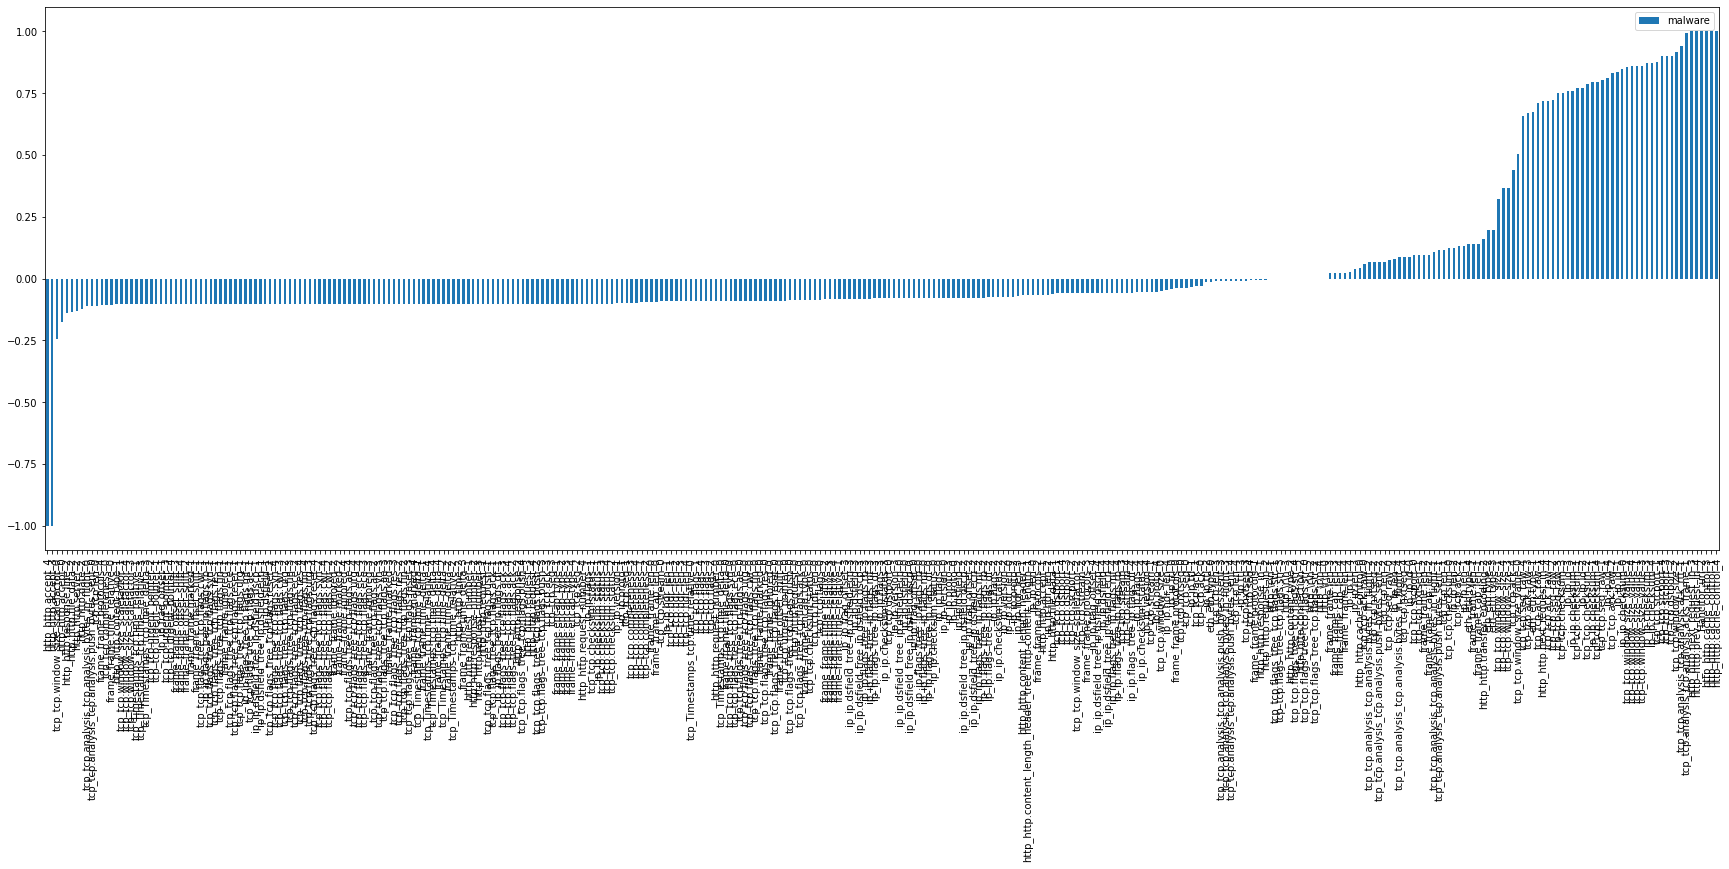

In [12]:
mixed_Hancitor_corr_df = mixed_Hancitor_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_Hancitor_corr_df
mixed_Hancitor_corr_df.plot(kind="bar", figsize=(30,10))

In [13]:
filtered_mixed_Hancitor_corr_df = mixed_Hancitor_corr_df[abs(mixed_Hancitor_corr_df['malware']) > 0.5]
corr_good_fields = list(filtered_mixed_Hancitor_corr_df.T.columns) 
print(len(corr_good_fields))
corr_good_fields

43


['http_http.accept_4',
 'http_http.accept_3',
 'tcp_tcp.window_size_value_0',
 'tcp_tcp.seq_raw_4',
 'tcp_tcp.ack_raw_3',
 'eth_eth.type_1',
 'tcp_tcp.ack_raw_1',
 'http_http.next_request_in_4',
 'tcp_tcp.ack_raw_4',
 'tcp_tcp.seq_raw_2',
 'tcp_tcp.seq_raw_3',
 'tcp_tcp.checksum_3',
 'ip_ip.id_3',
 'ip_ip.checksum_2',
 'tcp_tcp.checksum_1',
 'ip_ip.id_2',
 'tcp_tcp.checksum_2',
 'ip_ip.checksum_1',
 'tcp_tcp.checksum_4',
 'tcp_tcp.seq_raw_1',
 'ip_ip.id_4',
 'tcp_tcp.ack_raw_2',
 'ip_ip.id_1',
 'ip_ip.checksum_0',
 'tcp_tcp.window_size_value_2',
 'tcp_tcp.window_size_value_4',
 'tcp_tcp.window_size_value_1',
 'tcp_tcp.window_size_value_3',
 'ip_ip.checksum_3',
 'ip_ip.checksum_4',
 'tcp_tcp.srcport_1',
 'tcp_tcp.srcport_4',
 'tcp_tcp.srcport_3',
 'tcp_tcp.dstport_2',
 'tcp_tcp.window_size_2',
 'tcp_tcp.analysis_tcp.analysis.ack_rtt_1',
 'tcp_tcp.analysis_tcp.analysis.acks_frame_1',
 'http_http.next_request_in_3',
 'http_http.prev_request_in_4',
 'Hancitor_url_2',
 'http_http.cache_cont

<AxesSubplot:>

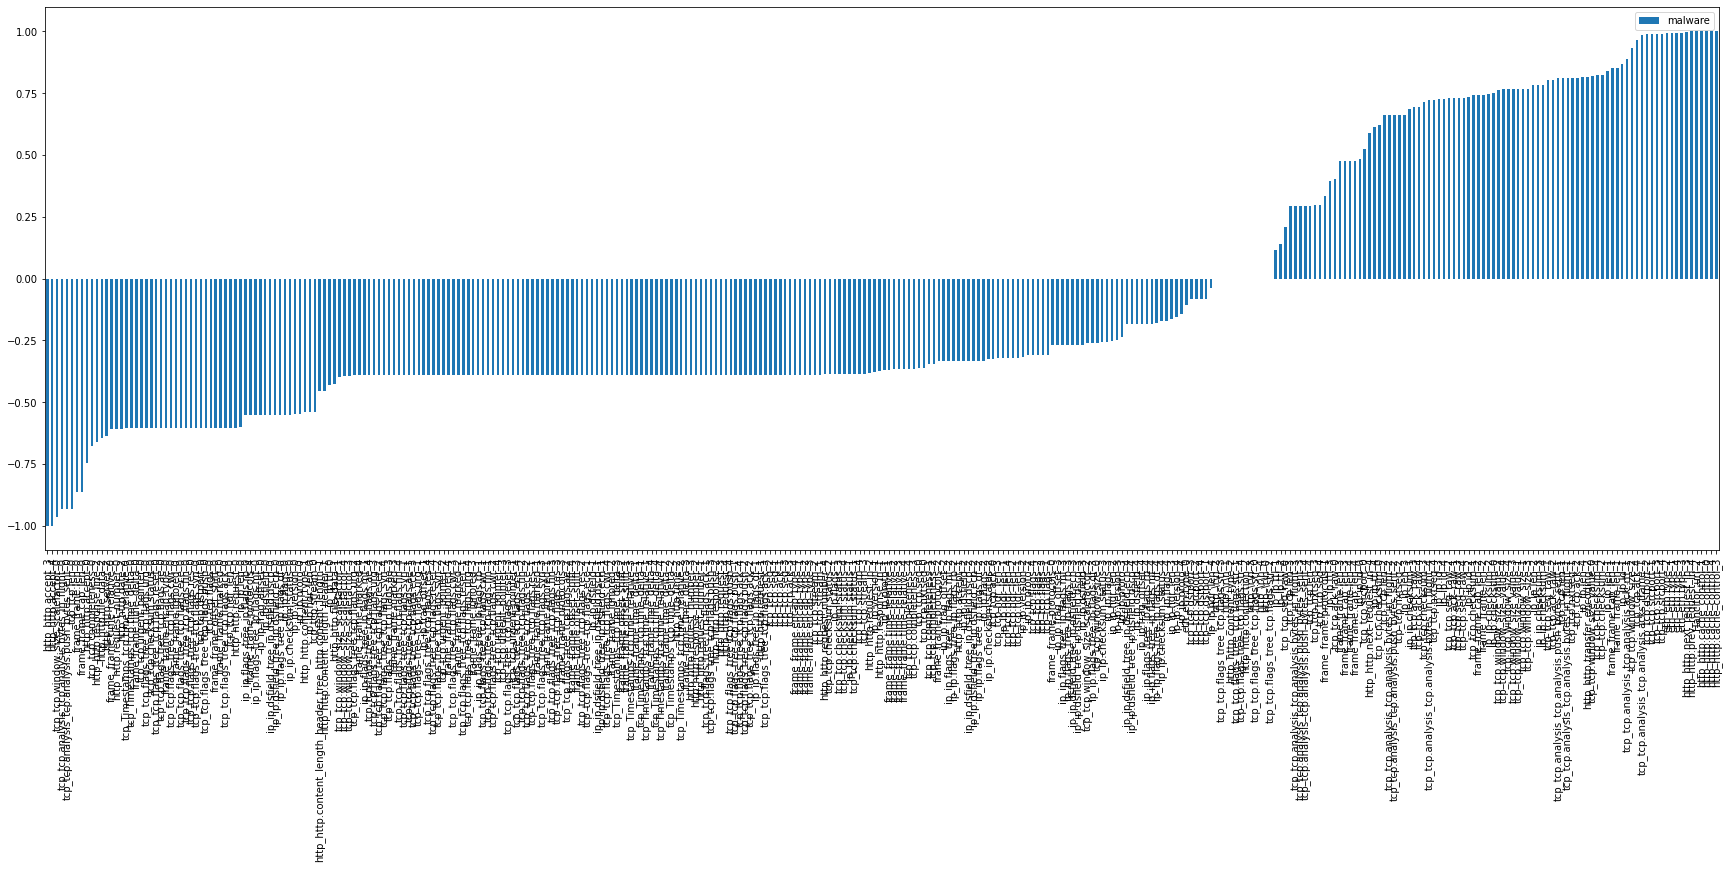

In [14]:
# one to one corr mixed_one_to_one_Hancitor_df
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_corr_df.loc[['malware'],:].fillna(0).drop(['malware'], axis=1).T.sort_values(by = 'malware')
mixed_one_to_one_Hancitor_corr_df.plot(kind="bar", figsize=(30,10))

In [15]:
mixed_one_to_one_Hancitor_corr_df = mixed_one_to_one_Hancitor_corr_df[abs(mixed_one_to_one_Hancitor_corr_df['malware']) > 0.5]
corr_one_to_one_good_fields = list(mixed_one_to_one_Hancitor_corr_df.T.columns) 
print(len(corr_one_to_one_good_fields))
corr_one_to_one_good_fields

127


['http_http.accept_3',
 'http_http.accept_4',
 'tcp_tcp.window_size_scalefactor_0',
 'tcp_tcp.analysis_tcp.analysis.bytes_in_flight_0',
 'tcp_tcp.analysis_tcp.analysis.push_bytes_sent_0',
 'tcp_tcp.len_0',
 'frame_frame.len_0',
 'frame_frame.cap_len_0',
 'http_http.accept_0',
 'tcp_tcp.completeness_0',
 'http_http.response.line_2',
 'http_http.file_data_2',
 'http_http.server_2',
 'frame_frame.time_relative_0',
 'http_http.request_number_0',
 'http_http.date_2',
 'tcp_Timestamps_tcp.time_relative_0',
 'tcp_Timestamps_tcp.time_delta_0',
 'frame_frame.time_delta_0',
 'tcp_tcp.urgent_pointer_0',
 'tcp_tcp.flags_tree_tcp.flags.urg_0',
 'tcp_tcp.checksum.status_0',
 'tcp_tcp.flags_tree_tcp.flags.reset_0',
 'tcp_tcp.flags_tree_tcp.flags.ae_0',
 'frame_frame.encap_type_0',
 'tcp_tcp.flags_tree_tcp.flags.cwr_0',
 'frame_frame.ignored_0',
 'tcp_tcp.flags_tree_tcp.flags.ece_0',
 'tcp_tcp.flags_tree_tcp.flags.fin_0',
 'tcp_tcp.flags_tree_tcp.flags.res_0',
 'tcp_tcp.flags_tree_tcp.flags.syn_0',
 '

# Use Fisher’s Score

In [16]:

def get_train_test_data(data_df, features_list, test_size, labels_list):
    #Set up train and test data
    #features_list = np.concatenate((full_attributes_list_np,full_categories_list_np,common_fields_list,open_hour_fields_list), axis=None)
    sc = StandardScaler()
    labels_list = labels_list
    X=data_df[features_list]
    #display("Before Change",X)
    sc.fit(X)
    X = sc.transform(X)
    #display("After Change",X[:,:5])
    #display(len(X))
    y=data_df[labels_list]
    if test_size == 0:
        return X,[],y,[]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=5)
    return X_train, X_test, y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

def get_k_fold_data_set(data_df, local_features_list, num_splits, labels_list, shuffle=True, to_df=False):
    sc = StandardScaler()
    kf = KFold(n_splits=num_splits, shuffle=shuffle)
    train_test_set_list=[]
    X=data_df[local_features_list]
    X = X.drop(labels_list, axis=1)
    X = X.to_numpy()

    sc.fit(X)
    X = sc.transform(X)
    y=data_df[labels_list].to_numpy()
    for train_index, test_index in kf.split(X):
        data_train, data_test = X[train_index], X[test_index]
        label_train, label_test = y[train_index], y[test_index]
        if to_df:
            data_train=pd.DataFrame(data_train,columns=local_features_list)
            data_test=pd.DataFrame(data_test,columns=local_features_list)
        train_test_set_list.append([data_train, data_test,label_train.flatten(), label_test.flatten()])
    return train_test_set_list


In [17]:
# mixed_Hancitor_df mixed mixed_one_to_one_Hancitor_df
k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(mixed_one_to_one_Hancitor_df, feature_list, 5, ['malware'])
len(k_fold_train_test_all_data_set_list_list)


5

In [18]:
# Do k-flod on malware record and normal record and mix them together, to make sure that trian and test both has the malware data
def k_fold_unmixed_malware_normal_record(local_malware_data_df, local_normal_data_df, features_list, num_splits, labels_list, oneToOne= False, shuffle=True, to_df=False):
    local_malware_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_malware_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    local_normal_k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(local_normal_data_df, features_list, num_splits, labels_list, shuffle, to_df)
    train_test_set_list= []
    for idx in range(len(local_malware_k_fold_train_test_all_data_set_list_list)):
        local_train_test_record = []
        if oneToOne:
            malware_train_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][0])
            malware_test_len = len(local_malware_k_fold_train_test_all_data_set_list_list[idx][1])
            local_normal_k_fold_train_test_all_data_set_list_list[idx][0] = local_normal_k_fold_train_test_all_data_set_list_list[idx][0][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][1] = local_normal_k_fold_train_test_all_data_set_list_list[idx][1][: malware_test_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][2] = local_normal_k_fold_train_test_all_data_set_list_list[idx][2][: malware_train_len]
            local_normal_k_fold_train_test_all_data_set_list_list[idx][3] = local_normal_k_fold_train_test_all_data_set_list_list[idx][3][: malware_test_len]

        for record_idx in range(4):
            local_train_test_record.append(np.concatenate((local_malware_k_fold_train_test_all_data_set_list_list[idx][record_idx], local_normal_k_fold_train_test_all_data_set_list_list[idx][record_idx])))
        train_random_idx = np.random.permutation(len(local_train_test_record[0]))
        test_random_idx = np.random.permutation(len(local_train_test_record[1]))
        local_train_test_record[0] = local_train_test_record[0][train_random_idx]
        local_train_test_record[1] = local_train_test_record[1][test_random_idx]
        local_train_test_record[2] = local_train_test_record[2][train_random_idx]
        local_train_test_record[3] = local_train_test_record[3][test_random_idx]
        train_test_set_list.append(local_train_test_record)
    return train_test_set_list


In [19]:
len(mixed_one_to_one_Hancitor_df.columns)

339

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


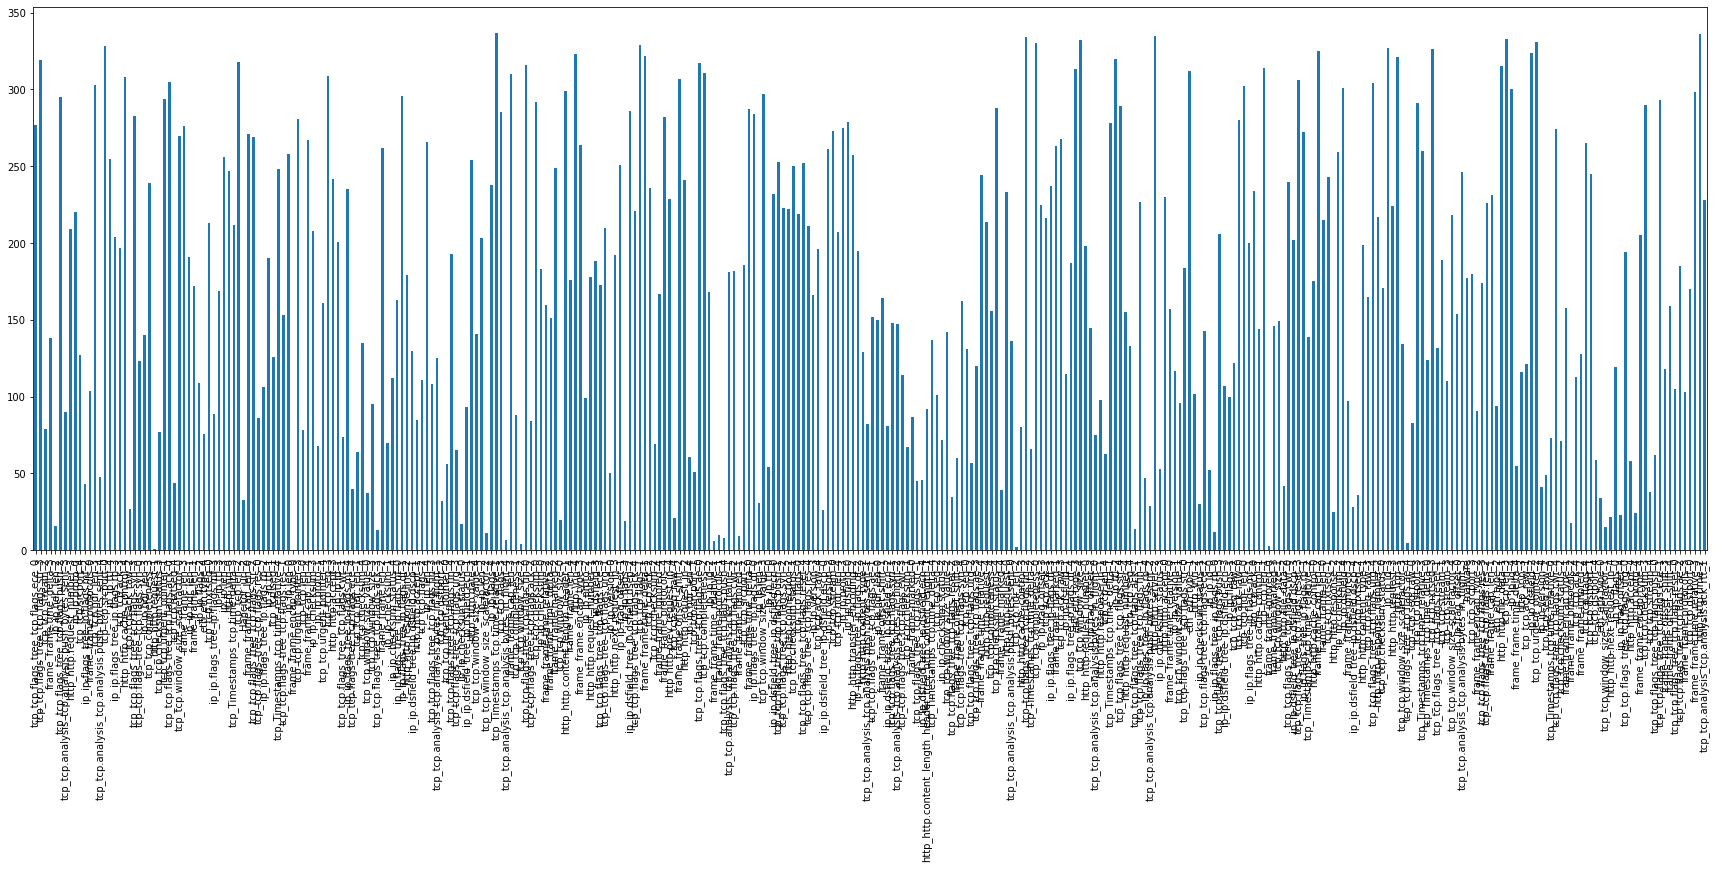

In [20]:
# Calculating scores 
score = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2])
featrue_importances = pd.Series(score, mixed_one_to_one_Hancitor_df.columns[0:len(mixed_one_to_one_Hancitor_df.columns)-1])
featrue_importances.plot(kind="bar", figsize=(30,10))
plt.show()

In [21]:
len(k_fold_train_test_all_data_set_list_list[0][0][0])
len(mixed_one_to_one_Hancitor_df.columns)

339

In [22]:
featrue_importances_df = pd.DataFrame({'field':featrue_importances.index, 'score': featrue_importances.values})
featrue_importances_df = featrue_importances_df.sort_values(by='score', ascending=False)
featrue_importances_df

,field,score
93,tcp_Timestamps_tcp.time_relative_1,337
336,http_http.time_2,336
226,http_http.server_2,335
200,tcp_tcp.flags_tree_tcp.flags.fin_2,334
297,tcp_tcp.len_3,333
...,...,...
98,tcp_tcp.window_size_2,4
249,frame_frame.ignored_0,3
198,tcp_tcp.hdr_len_2,2
24,http_http.request_1,1


In [23]:
fisher_rank = fisher_score.fisher_score(k_fold_train_test_all_data_set_list_list[0][0], k_fold_train_test_all_data_set_list_list[0][2], mode='rank')
fisher_rank

c:\Users\Chip_cat\AppData\Local\Programs\Python\Python39\lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in true_divide
  score = 1.0 / lap_score - 1


array([277, 319,  79, 138,  16, 295,  90, 209, 220, 127,  43, 104, 303,
        48, 328, 255, 204, 197, 308,  27, 283, 123, 140, 239,   1,  77,
       294, 305,  44, 270, 276, 191, 172, 109,  76, 213,  89, 169, 256,
       247, 212, 318,  33, 271, 269,  86, 106, 190, 126, 248, 153, 258,
         0, 281,  78, 267, 208,  68, 161, 309, 242, 201,  74, 235,  40,
        64, 135,  37,  95,  13, 262,  70, 112, 163, 296, 179, 130,  85,
       111, 266, 108, 125,  32,  56, 193,  65,  17,  93, 254, 141, 203,
        11, 238, 337, 285,   7, 310,  88,   4, 316,  84, 292, 183, 160,
       151, 249,  20, 299, 176, 323, 264,  99, 178, 188, 173, 210,  50,
       192, 251,  19, 286, 221, 329, 322, 236,  69, 167, 282, 229,  21,
       307, 241,  61,  51, 317, 311, 168,   6,  10,   8, 181, 182,   9,
       186, 287, 284,  31, 297,  54, 232, 253, 223, 222, 250, 219, 252,
       211, 166, 196,  26, 261, 273, 207, 275, 279, 257, 195, 129,  82,
       152, 150, 164,  81, 148, 147, 114,  67,  87,  45,  46,  9

# Start to do SVM training

In [24]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, mean_squared_error

In [25]:
kernel_list=['rbf', 'poly', 'sigmoid']
param_grid = {'C': [1, 10, 25, 50, 100], 'gamma': [0.1, 0.05, 0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid'], 'degree':[3,9]}

In [26]:
def get_rt_model_score(model, train_test_data_set_list, allow_log=True):
    X,x,Y,y = train_test_data_set_list
    score_message_dict={}
    y_pred=model.predict(x)
    x_pred=model.predict(X)
    score_message_dict['accuracy_score'] = accuracy_score(y, y_pred)
    score_message_dict['precision_score'] = precision_score(y, y_pred,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,y_pred,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,y_pred,average='weighted')
    score_message_dict['train_rmse'] = np.sqrt(mean_squared_error(Y, x_pred))
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, y_pred))

    if allow_log:
        print("Accuracy for Train set:",accuracy_score(Y, x_pred))
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('train_rmse: %.3f' % score_message_dict['train_rmse'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

def get_score(result_list, y, allow_log=True):
    score_message_dict={}
    score_message_dict['accuracy_score'] = accuracy_score(y, result_list)
    score_message_dict['precision_score'] = precision_score(y, result_list,average='weighted')
    score_message_dict['recall_score'] = recall_score(y,result_list,average='weighted')
    score_message_dict['f1_score'] = f1_score(y,result_list,average='weighted')
    score_message_dict['test_rmse'] = np.sqrt(mean_squared_error(y, result_list))

    if allow_log:
        print('accuracy_score: %.3f' % score_message_dict['accuracy_score'])
        print('precision_score: %.3f' % score_message_dict['precision_score'])
        print('recall_score: %.3f' % score_message_dict['recall_score'])
        print('f1_score: %.3f' % score_message_dict['f1_score'])
        print('test_rmse: %.3f' % score_message_dict['test_rmse'])
        print()

    return score_message_dict

In [27]:
def train_SVM(model,train_test_data_set_list):
    X,x,Y,y = train_test_data_set_list
    model.fit(X,Y)
    return model

### Let me start with Linear Kernel 

In [28]:
# get_k_fold_data_set(mixed_Hancitor_df, list(mixed_Hancitor_df.columns), 5, ['malware'])
# get_train_test_data(mixed_one_to_one_Hancitor_df, list(mixed_one_to_one_Hancitor_df.columns), 0.2, ['malware'])
train_test_data_set_list = list(get_train_test_data(mixed_Hancitor_df, list(mixed_Hancitor_df.columns), 0.2, ['malware']))
linear_SVM_clf = svm.SVC(kernel='linear')
linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_set_list)
get_rt_model_score(linear_SVM_clf, train_test_data_set_list)

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



{'accuracy_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'train_rmse': 0.0,
 'test_rmse': 0.0}

In [29]:
# with K fold k=5
k_fold_train_test_all_data_set_list_list = get_k_fold_data_set(mixed_Hancitor_df, list(mixed_Hancitor_df.columns), 5, ['malware'])
score_list = []
for train_test_data_list in k_fold_train_test_all_data_set_list_list:
    linear_SVM_clf = svm.SVC(kernel='linear')
    linear_SVM_clf = train_SVM(linear_SVM_clf,train_test_data_list)
    score_list.append(get_rt_model_score(linear_SVM_clf, train_test_data_list))

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000

Accuracy for Train set: 1.0
accuracy_score: 1.000
precision_score: 1.000
recall_score: 1.000
f1_score: 1.000
train_rmse: 0.000
test_rmse: 0.000



# Free Space

In [ ]:
for t in k_fold_train_test_all_data_set_list_list[0][0]:
    print(t[84])

In [ ]:
k_fold_train_test_all_data_set_list_list[0][2]

In [ ]:
#IcedId_raw_data_df IcedId_noraml_raw_data_df
for idx in range(len(list(IcedId_noraml_raw_data_df.columns))):
    if list(IcedId_raw_data_df.columns)[idx] == 'IcedIdCookie_0':
        print(idx)